In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
data = pd.read_csv('historico_bioma_completo.csv', encoding='latin-1', na_values=['-'])

In [3]:
data.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Bioma
0,1998,NaN,NaN,NaN,NaN,NaN,1549.0,3192.0,20075,19214.0,8777,3833,2547,59187,Amazônia
1,1999,160.0,358.0,130.0,70.0,449.0,1439.0,3675.0,21525,16106.0,12794,4449,1703,62858,Amazônia
2,2000,87.0,182.0,405.0,92.0,930.0,3211.0,1510.0,12791,10062.0,10226,5497,3175,48168,Amazônia
3,2001,165.0,699.0,1134.0,617.0,916.0,4227.0,1816.0,17679,15528.0,14292,8346,4256,69675,Amazônia
4,2002,590.0,667.0,901.0,405.0,1490.0,5702.0,7529.0,43484,48549.0,27110,23660,9174,169261,Amazônia


In [4]:
data.fillna(0, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ano        138 non-null    int64  
 1   Janeiro    138 non-null    float64
 2   Fevereiro  138 non-null    float64
 3   Março      138 non-null    float64
 4   Abril      138 non-null    float64
 5   Maio       138 non-null    float64
 6   Junho      138 non-null    float64
 7   Julho      138 non-null    float64
 8   Agosto     138 non-null    int64  
 9   Setembro   138 non-null    float64
 10  Outubro    138 non-null    int64  
 11  Novembro   138 non-null    int64  
 12  Dezembro   138 non-null    int64  
 13  Total      138 non-null    int64  
 14  Bioma      138 non-null    object 
dtypes: float64(8), int64(6), object(1)
memory usage: 16.3+ KB


In [9]:
inicio = data['Ano'].min()
fim = data['Ano'].max()
print(f'Ano de inicio: {inicio}')
print(f'Ano de termino: {fim}')

Ano de inicio: 1998
Ano de termino: 2020


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,138.0,2009.000000,6.657415,1998.0,2003.00,2009.0,2015.00,2020.0
Janeiro,138.0,530.550725,731.694085,0.0,68.00,316.5,660.00,4657.0
Fevereiro,138.0,312.021739,354.319446,0.0,42.25,204.0,447.00,1761.0
Março,138.0,382.036232,485.641128,0.0,44.25,167.0,597.50,3383.0
Abril,138.0,353.956522,380.392898,0.0,51.75,152.5,615.00,1702.0
Maio,138.0,568.202899,707.560847,0.0,59.00,204.5,854.75,3131.0
Junho,138.0,1264.971014,1796.500645,0.0,84.50,338.0,1758.50,9179.0
Julho,138.0,2528.115942,3605.604822,0.0,220.50,676.5,3604.50,19364.0
Agosto,138.0,7844.094203,11567.152323,7.0,567.75,2477.0,10354.50,63764.0
Setembro,138.0,10932.514493,15299.872996,0.0,1255.25,3624.5,16451.00,73141.0


In [7]:
data['Bioma'].describe()

count          138
unique           6
top       Amazônia
freq            23
Name: Bioma, dtype: object

In [8]:
meses = data.columns.values[1:13]

## Gráfico de Linha

### Plotando somente o Bioma Amazônia

In [9]:
data_aux = data[data['Bioma'] == 'Amazônia']

In [10]:
y = data_aux.iloc[0, 1:13]

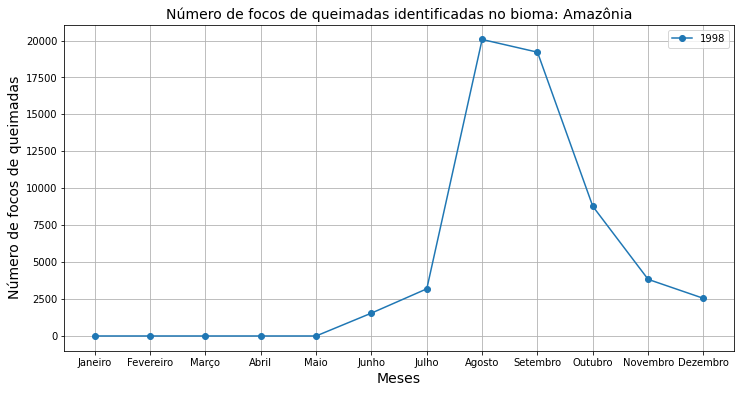

In [11]:
plt.figure(figsize=(12,6))
plt.plot(meses, y, label=str(data.iloc[0, 0]), marker='o')
plt.legend(loc='upper right')
plt.xlabel('Meses', fontsize=14)
plt.ylabel('Número de focos de queimadas', fontsize=14)
plt.title(f'Número de focos de queimadas identificadas no bioma: {data_aux.loc[0][14]}', fontsize=14)
plt.grid(visible=True)

Text(0, 0.5, 'Número de focos de queimadas')

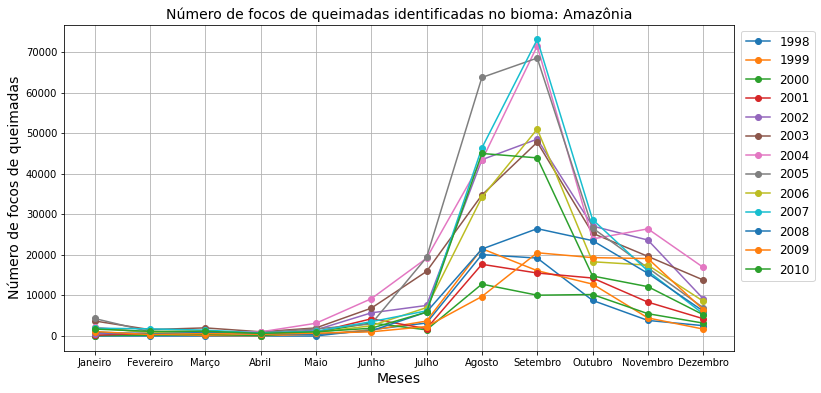

In [12]:
plt.figure(figsize=(12,6))

for i in range(13):
    plt.plot(meses, data_aux.iloc[i, 1:13], label=str(data.iloc[i, 0]), marker='o')
    
plt.legend(bbox_to_anchor=(1.13, 1), fontsize=12)
plt.grid(visible=True)
plt.title(f'Número de focos de queimadas identificadas no bioma: {data_aux.loc[0][14]}', fontsize=14)
plt.xlabel('Meses', fontsize=14)
plt.ylabel('Número de focos de queimadas', fontsize=14)

### Plotando outros Biomas

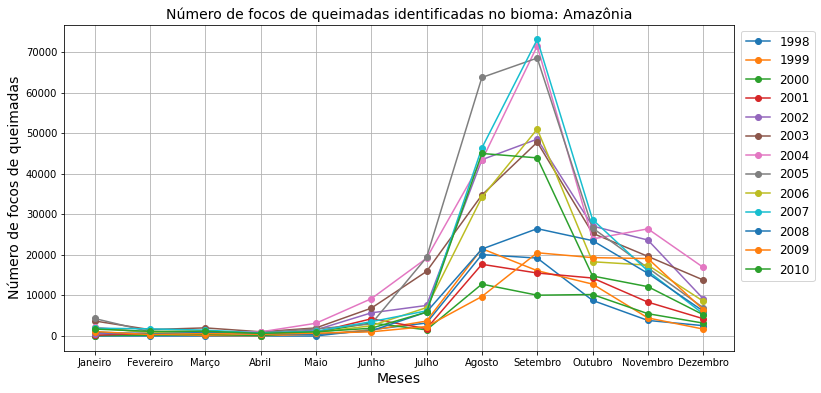

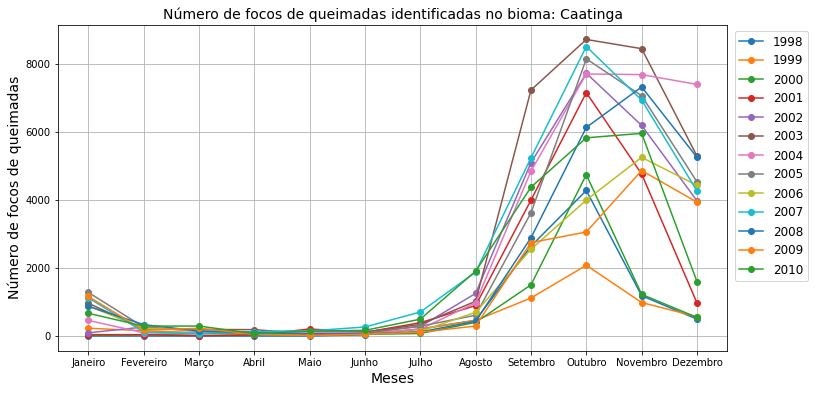

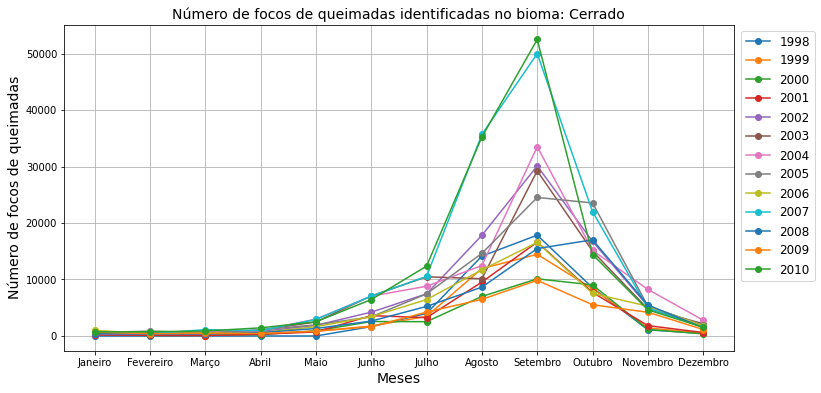

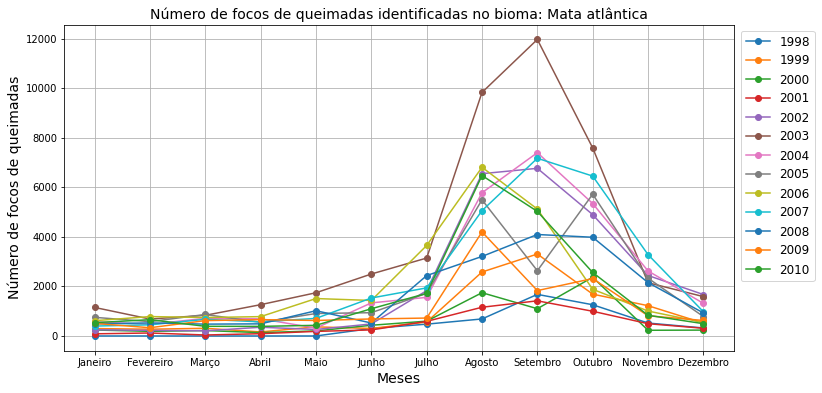

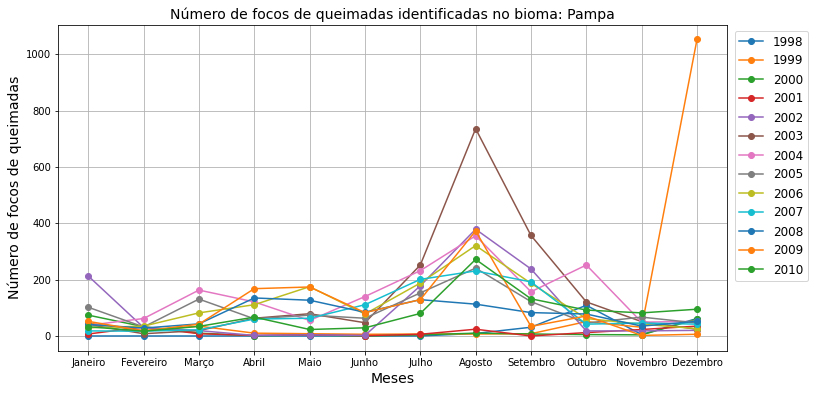

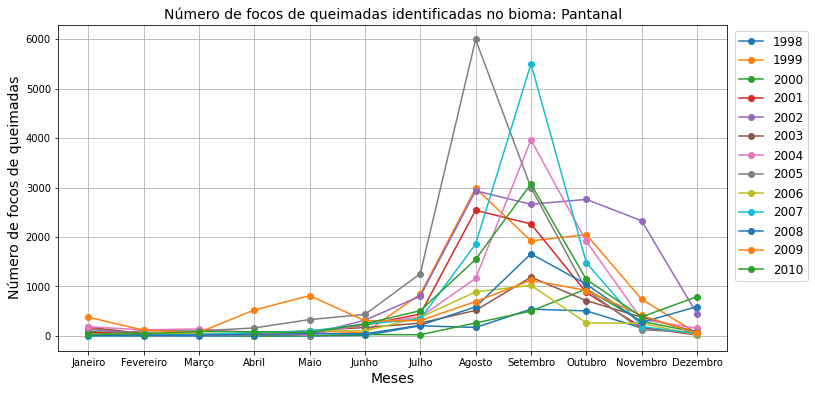

In [14]:
unique_bioma = data['Bioma'].unique()

for j in range(len(unique_bioma)):
    data_aux = data[data['Bioma'] == unique_bioma[j]]
    data_aux.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(12,6))
    for i in range(13):
            plt.plot(meses, data_aux.iloc[i, 1:13], label=str(data.iloc[i, 0]), marker='o')
    
    plt.legend(bbox_to_anchor=(1.13, 1), fontsize=12)
    plt.grid(visible=True)
    plt.title(f'Número de focos de queimadas identificadas no bioma: {data_aux.loc[0][14]}', fontsize=14)
    plt.xlabel('Meses', fontsize=14)
    plt.ylabel('Número de focos de queimadas', fontsize=14)
    plt.show()

## Gráfico de Barras

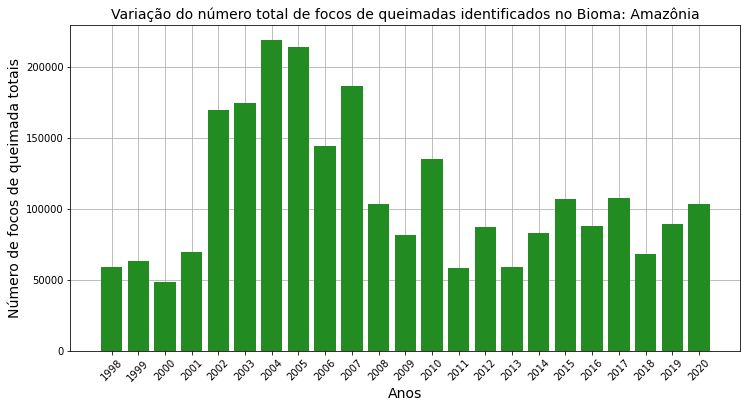

In [15]:
data_aux = data[data['Bioma'] == 'Amazônia']
plt.figure(figsize=(12,6))
plt.bar(data_aux['Ano'], data_aux['Total'], zorder=2, color='forestgreen')
plt.grid(visible=True, zorder=0)
plt.xticks(data_aux['Ano'], rotation=45)
titulo = f"Variação do número total de focos de queimadas identificados no Bioma: {data_aux['Bioma'][0]}"
plt.title(titulo,fontsize=14)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de focos de queimada totais', fontsize=14)
plt.show()

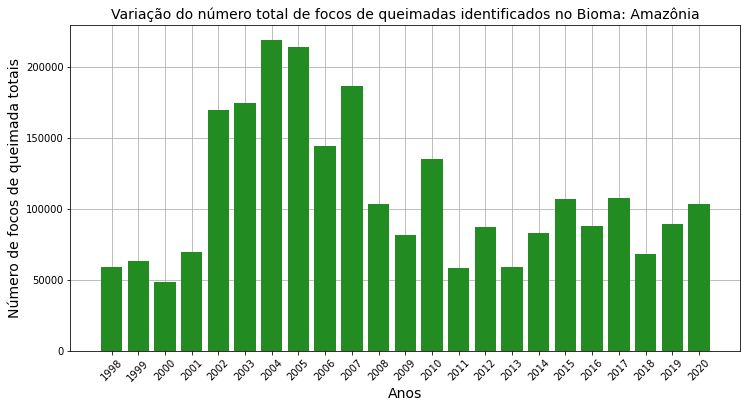

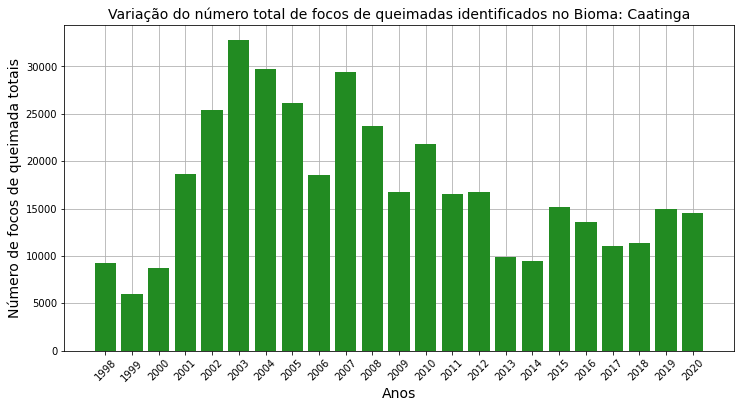

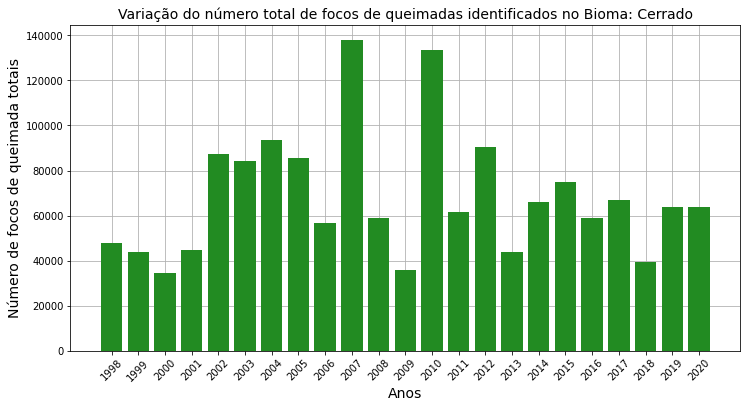

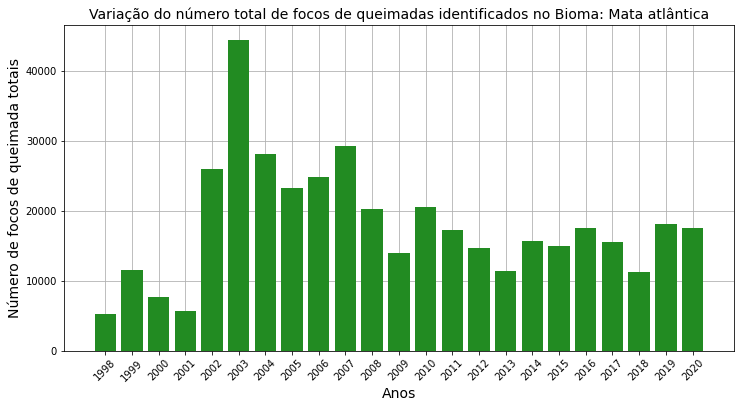

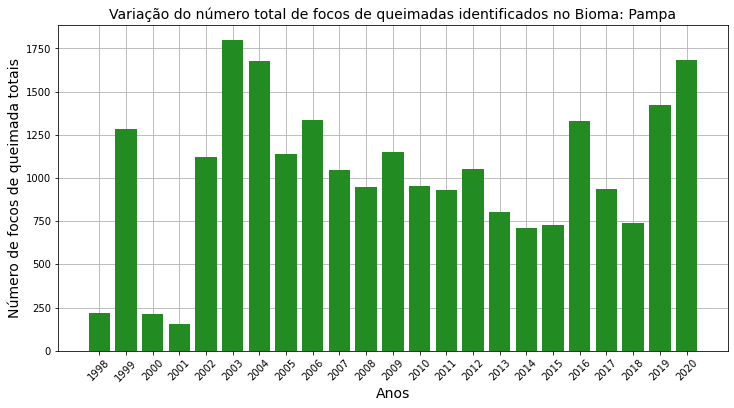

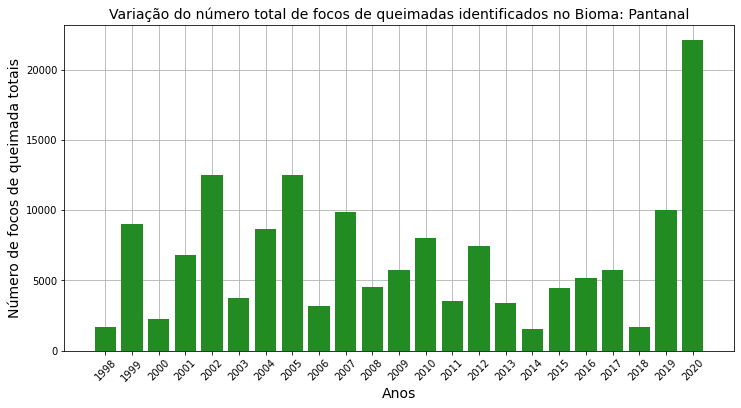

In [16]:
unique_bioma = data['Bioma'].unique()

for j in range(len(unique_bioma)):
    data_aux = data[data['Bioma'] == unique_bioma[j]]
    data_aux.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(12,6))
    plt.bar(data_aux['Ano'], data_aux['Total'], zorder=2, color='forestgreen')
    plt.grid(visible=True, zorder=0)
    titulo = f"Variação do número total de focos de queimadas identificados no Bioma: {data_aux['Bioma'][0]}"
    plt.title(titulo, fontsize=14)
    plt.xlabel('Anos', fontsize=14)
    plt.ylabel('Número de focos de queimada totais', fontsize=14)
    plt.xticks(data_aux['Ano'], rotation=45)
    plt.show()

In [12]:
def exploder():
    zeros = np.zeros(shape=23)
    for i in range(len(ones)):
        a = np.random.randint(low=0, high=2)
        b = np.random.random() - 0.7
        if (np.sign(b) != -1):
            zeros[i] = b
    return zeros

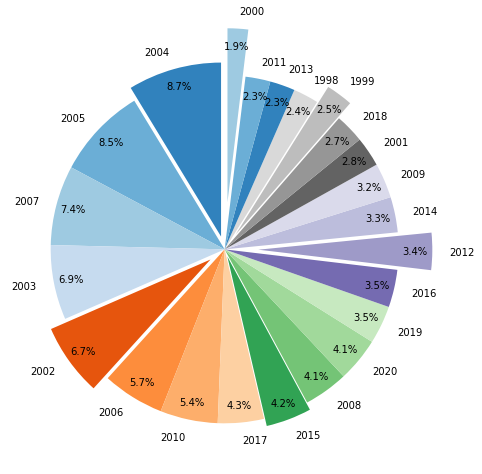

In [18]:
ones = np.ones(shape=23)
data_aux = data[data['Bioma'] == 'Amazônia']
x, y = list(zip(*sorted(zip(data_aux['Total'], data_aux['Ano']), reverse=True)))
plt.figure(figsize=(8,8))
plt.pie(x = x, labels=y, colors=cm.tab20c.colors, startangle=90, autopct='%1.1f%%',
       pctdistance=0.9, explode=exploder())
plt.show()